In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from mpl_toolkits.mplot3d import axes3d

 %matplotlib notebook

In [30]:
r1 = []
def CreateSphere(Npoints, R):
    
    X = []
    Y = []
    Z = []
    
    r = 0.
    
    theta = 0.
    phi = 0.
    
    for i in range(Npoints):
        
        
        phi = np.random.uniform(0.,2*np.pi)
        costheta = np.random.uniform(-1.,1.)
        theta = np.arccos(costheta)
        
        u = np.random.rand()
        
        r = R*u**(1./3.)
        #r = R*u
        
        r1.append(u**(1./3.))    
        #r = R
        
        X = np.append(X, r*np.cos(phi)*np.sin(theta))
        Y = np.append(Y, r*np.sin(phi)*np.sin(theta))
        Z = np.append(Z, r*np.cos(theta))
        
    return X,Y,Z

(array([ 5.,  5.,  4., 10., 16., 17., 29., 25., 39., 50.]),
 array([0.1335351 , 0.22005839, 0.30658168, 0.39310497, 0.47962826,
        0.56615154, 0.65267483, 0.73919812, 0.82572141, 0.9122447 ,
        0.99876799]),
 <a list of 10 Patch objects>)

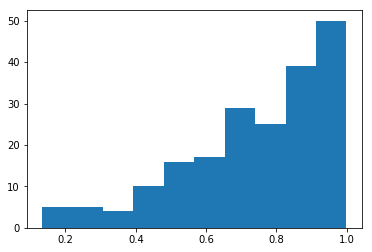

In [31]:
data_sphere = CreateSphere(200,1.)
data_sphere = np.array(data_sphere)
#print(data_sphere)
plt.hist(r1)

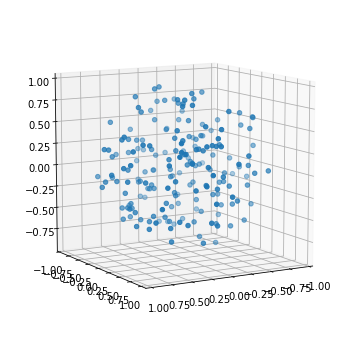

In [32]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1,projection='3d')

ax.view_init(10,60)

ax.scatter(data_sphere[0],data_sphere[1],data_sphere[2])
plt.show()

$$\int \int_{0}^{\infty} e^{-r} r^{2} sin(\theta) dr d\Omega = 2\pi^{2} $$

In [33]:
def GetExponentialSphere(r,alpha):
    return -alpha*np.log(1.-r)

In [34]:
def GetPointsSphere():
    
    costheta = np.random.uniform(-1.,1.)
    theta = np.arccos(costheta)
    
    u = np.random.rand()
    
    r = GetExponentialSphere(u**(1./3.),1.)
    
    return r,theta

In [35]:
def f(r,theta):
    return r**2*np.sin(theta)**2

In [36]:
Hr = []

In [37]:
def GetIntegral(Npoints):
    
    Sample = []
    
    for i in range(Npoints):
        
        r,theta = GetPointsSphere()
        Hr.append(r)
        
        Sample.append(f(r,theta))
        
    Integral = 2.*np.pi* np.average(Sample)
    
    return Integral

In [41]:
print(GetIntegral(int(8e4)),2*np.pi**2)

(19.96419844824795, 19.739208802178716)


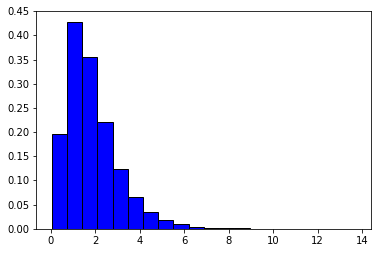

In [44]:
plt.hist(Hr,bins=20,density=True, ec='k',color='b')
plt.show()

In [45]:
# Integración con Metropolis-Hastings

In [46]:
def GetTheta():
    costheta = np.random.uniform(-1.,1.)
    return np.arccos(costheta) 

In [47]:
def GetR():
    r = 2.0*(np.random.rand()-0.5)
    return r

$$ u^{1/3} = \int_{-\infty}^{x} \frac{1}{\alpha} e^{-x/\alpha} dx $$

In [71]:
def WeightF(r,alpha=1.):
    return (3.*(1.-np.exp(-r/alpha))**2*np.exp(-r/alpha))/alpha
    #return np.exp(-r/alpha)/alpha
    

In [72]:
def Metropolis(r0_, Width=1.3, NSteps=int(1e5), alpha_=1.):
    
    Theta = np.array([])
    R = np.array([])
    
    for i in tqdm(range(int(NSteps))):
        
        p0 = WeightF(r0_, alpha = alpha_)
        
        rn_ = r0_ + Width*GetR()
        
        if rn_ < 0:
            rn_ = - rn_
    
        pn = WeightF(rn_,alpha = alpha_)
        
        alpha = pn/p0
        
        beta = np.random.rand()
        
        if np.minimum(1,alpha) > beta:
            
            r0_ = rn_
            
            R = np.append(R,rn_)
            Theta = np.append(Theta,GetTheta())
            
        else:
            
            R = np.append(R,r0_)
            Theta = np.append(Theta,GetTheta())
            
    return R,Theta

In [73]:
R, Theta = Metropolis(1.2)

100%|██████████| 100000/100000 [00:30<00:00, 3261.23it/s]


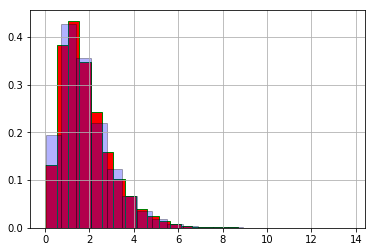

In [74]:
plt.hist(R, bins=20,color='r',density=True, ec='g',alpha=1.0)
plt.hist(Hr,bins=20,color='b',density=True, ec='k',alpha=0.3 )
#plt.xlim(0,4)
#plt.yscale('log')
plt.grid()
plt.show()

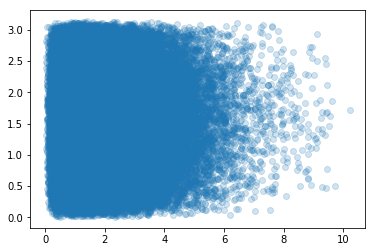

In [75]:
plt.scatter(R,Theta, alpha=0.2)

In [77]:
I = 2.*np.pi*np.average(f(R,Theta))
print(I,2*np.pi**2)

(19.863489517102686, 19.739208802178716)


$$\frac{1}{4}\int \int_{0}^{\infty} 4 e^{-4r} r^{2}dr d\Omega = \frac{\pi}{8}$$

In [78]:
def F(r,theta):
    
    return r**2*np.sin(theta)

In [85]:
R1,Theta1=Metropolis(1.5, alpha_=1./4.)

100%|██████████| 100000/100000 [00:29<00:00, 3350.31it/s]


In [86]:
I = np.pi/2.

I *= np.average(F(R1,Theta))

print(I,np.pi/8.)

(0.36932380630371814, 0.39269908169872414)


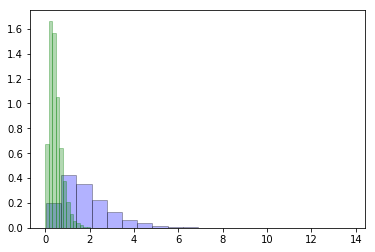

In [87]:
plt.hist(Hr,bins=20,color='b',density=True, ec='k',alpha=0.3 )
plt.hist(R1,bins=20,color='g',density=True, ec='g',alpha=0.3 )
plt.show()